<a href="https://colab.research.google.com/github/saun09/Machine-Learning/blob/main/TextExtractionOCRipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

In [149]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install easyocr

Looking in indexes: https://download.pytorch.org/whl/cu118


In [131]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [150]:
img0_path = '/content/text0.jpg'
img1_path = '/content/text1.jpg'
img2_path = '/content/text2.jpg'
img3_path = '/content/text3.jpg'
img4_path = '/content/text4.jpg'
img5_path = '/content/text5.jpg'
img6_path = '/content/text6.png'
img7_path = '/content/text7.png'
img8_path = '/content/text8.jpg'
img9_path = '/content/text9.png'
#img10_path= '/content/text10.png'
img11_path= '/content/text11.png'
img12_path= '/content/test12.png'
img13_path= '/content/test13.png'


In [151]:
img_path = "/content/"
create_path = lambda f : os.path.join(img_path, f)
test_image_files = os.listdir(img_path)

for f in test_image_files:
    print(f)


.config
text2.jpg
text0.jpg
text6.png
text3.jpg
test13.png
text7.png
text1.jpg
.ipynb_checkpoints
text4.jpg
text8.jpg
Output
test12.png
text5.jpg
text9.png
text11.png
sample_data


In [152]:
img = test_image_files[12]
path = create_path(img)

In [153]:
# detect text from an image
def recognize_text(img_path):
    ''' reads an image and extracts text from it '''


    reader = easyocr.Reader(['en'])  # can add other languages like 'hi' for Hindi
    text_data = reader.readtext(img_path)
    return text_data


In [154]:
result = recognize_text('/content/test13.png')

In [155]:
result

[([[25, 29], [328, 29], [328, 81], [25, 81]],
  '(Believe you can',
  0.9350840773471946),
 ([[80, 70], [277, 70], [277, 125], [80, 125]],
  "and you' re",
  0.7038995478469251),
 ([[32, 113], [318, 113], [318, 169], [32, 169]],
  'halfway there "',
  0.6737573516070559),
 ([[71, 181], [281, 181], [281, 201], [71, 201]],
  'THEODORE ROOSEVELT',
  0.7110361949890148)]

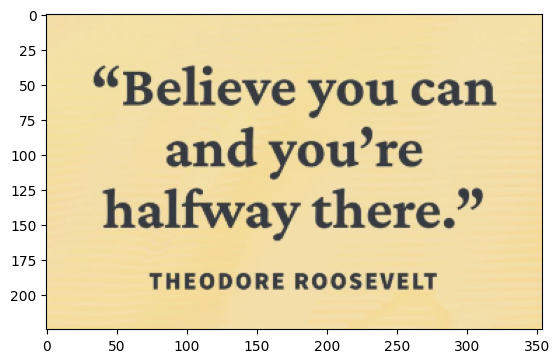

In [160]:
img_13 = cv2.imread('/content/test13.png')
img_13 = cv2.cvtColor(img_13, cv2.COLOR_BGR2RGB)
plt.imshow(img_13)

In [163]:
import os
import cv2
import matplotlib.pyplot as plt

def overlay_ocr_text(img_path, save_name):

    output_folder = "./Output/"
    if not os.path.isdir(output_folder):
        os.makedirs(output_folder)


    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    larger_figsize = (10, 7)
    fig, axes = plt.subplots(1, 2, figsize=larger_figsize)
    axes[0].imshow(image)
    axes[0].set_title("Original Image", fontsize=18)


    results = recognize_text(img_path)


    for box, detected_text, confidence in results:
        if confidence >= 0.2:
            print(f"Found text: {detected_text} (Confidence: {confidence:.2f})")


            top_left = tuple(map(int, box[0]))
            bottom_right = tuple(map(int, box[2]))


            cv2.rectangle(image, top_left, bottom_right, (255, 0, 0), thickness=10)
            cv2.putText(image, detected_text, (top_left[0], top_left[1] - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), thickness=8)

    axes[1].imshow(image)
    axes[1].set_title("Image with OCR Overlay", fontsize=18)
    output_path = os.path.join(output_folder, f"{save_name}_overlay.jpg")
    plt.savefig(output_path, bbox_inches="tight")
    print(f"Saved the image with overlay at: {output_path}")
    plt.show()


Found text: (Believe you can (Confidence: 0.94)
Found text: and you' re (Confidence: 0.70)
Found text: halfway there " (Confidence: 0.67)
Found text: THEODORE ROOSEVELT (Confidence: 0.71)
Saved the image with overlay at: ./Output/Text13_Output_overlay.jpg


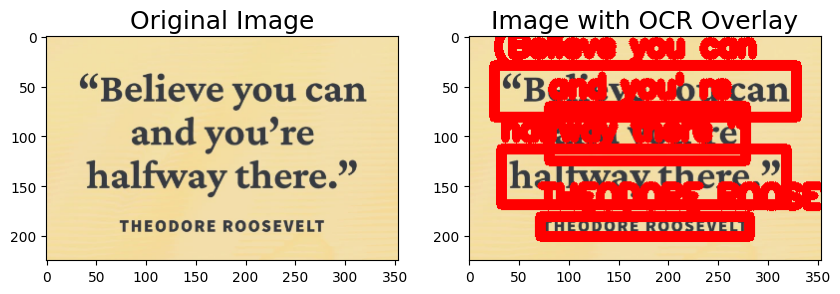

In [164]:
overlay_ocr_text('/content/test13.png', 'Text13_Output')

In [165]:
def extract_text_from_image(image_path):

    recognized_data = recognize_text(image_path)

    for(bounding_box, detected_text, probability) in recognized_data:
        if probability > 0.2:  # Check if probability is above 0.2
            print(f'Text detected: {detected_text}')


In [166]:
ocr_text('/content/test13.png')

(Believe you can
and you' re
halfway there "
THEODORE ROOSEVELT
